In [1]:
import numpy as np
import matplotlib.pyplot as plt


def policy_evaluation(policy, theta=0.01, max_iter=100, initial_V=None, grid_world=np.zeros((4,4))):
    if initial_V is None:
        initial_V = np.zeros((4,4))

    for i in range(max_iter):
        delta = 0
        for i in range(4):
            for j in range(4):
                if grid_world[i, j] == 1:
                    continue
                v = initial_V[i, j]
                near_states = [ (max(i-1, 0), j),\
                                (min(i+1, 3), j),\
                                (i, max(j-1, 0)),\
                                (i, min(j+1, 3))]
                initial_V[i, j] = sum([policy[i, j, k] * (-1 + 1*initial_V[near_states[k]]) for k in range(4)])
                delta = max(delta, abs(v - initial_V[i, j]))
        if delta < theta:
            break
    return initial_V


def policy_improvement(policy, V, grid_world=np.zeros((4,4))):
    new_policy = np.zeros((4,4,4))

    for i in range(4):
        for j in range(4):
            if grid_world[i, j] == 1:
                continue
            old_action = policy[i, j]
            near_states = [ (max(i-1, 0), j),\
                            (min(i+1, 3), j),\
                            (i, max(j-1, 0)),\
                            (i, min(j+1, 3))]
            q_values = np.array([(-1 + 1*V[near_states[k]]) for k in range(4)])
            best_action = np.argmax(q_values)
            new_policy[i, j, best_action] = 1

    return new_policy


def policy_iteration(policy, theta=0.01, max_iter=10, initial_V=None, grid_world=np.zeros((4,4))):

    if initial_V is None:
        initial_V = np.zeros((4,4))
    for i in range(max_iter*100):
        V = policy_evaluation(policy, theta, max_iter, initial_V, grid_world)
        new_policy = policy_improvement(policy, V, grid_world)
        if np.array_equal(policy, new_policy):
            print("Policy Iteration Converged")
            break
        policy = new_policy
        # plot_policy(grid_world, V, policy)

    return policy, V


def value_iteration(theta=0.01, max_iter=100, grid_world=np.zeros((4,4))):
    V = np.zeros((4,4))
    for i in range(max_iter):
        delta = 0
        for i in range(4):
            for j in range(4):
                if grid_world[i, j] == 1:
                    continue
                v = V[i, j]
                near_states = [ (max(i-1, 0), j),\
                                (min(i+1, 3), j),\
                                (i, max(j-1, 0)),\
                                (i, min(j+1, 3))]
                q_values = np.array([(-1 + 1*V[near_states[k]]) for k in range(4)])
                V[i, j] = max(q_values)
                delta = max(delta, abs(v - V[i, j]))
        if delta < theta:
            break

    policy = np.zeros((4,4,4))
    for i in range(4):
        for j in range(4):
            if grid_world[i, j] == 1:
                continue
            near_states = [ (max(i-1, 0), j),\
                            (min(i+1, 3), j),\
                            (i, max(j-1, 0)),\
                            (i, min(j+1, 3))]
            q_values = np.array([(-1 + 1*V[near_states[k]]) for k in range(4)])
            best_action = np.argmax(q_values)
            policy[i, j, best_action] = 1

    return policy, V


def plot_policy(grid_world=None, state_value_function=None, policy=None):
    plt.figure(figsize=(10,3))

    if grid_world is not None:
        plt.subplot(1, 3, 1)
        plt.imshow(1-grid_world, cmap='gray', interpolation='nearest')
        plt.title("Grid World")
    
    if state_value_function is not None:
        plt.subplot(1, 3, 2)
        plt.imshow(state_value_function, cmap='viridis', interpolation='nearest')
        for i in range(4):
            for j in range(4):
                plt.text(j, i, "{:.2f}".format(state_value_function[i, j]), ha='center', va='center')
        plt.title("State Value Function")
        plt.xticks([])
        plt.yticks([])
    
    if policy is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(1-grid_world, cmap='gray')
        for i in range(4):
            for j in range(4):
                if grid_world[i, j] == 1:
                    continue
                if policy[i, j, 0] == 1:
                    plt.arrow(j, i, 0, -0.5, head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 1] == 1:
                    plt.arrow(j, i, 0, 0.5, head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 2] == 1:
                    plt.arrow(j, i, -0.5, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 3] == 1:
                    plt.arrow(j, i, 0.5, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
        plt.title("Policy")
        plt.xticks([])
        plt.yticks([])

    plt.show()

### Grid World

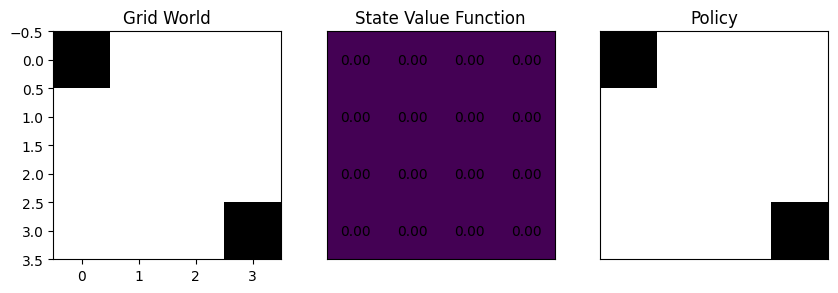

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Grid World
grid_world = np.zeros((4,4))
grid_world[0,0] = 1     # Terminal State
grid_world[3,3] = 1     # Terminal State

V = np.zeros((4,4))

# Initial Policy
policy = np.ones((4,4,4))/4
policy[0,0] = np.zeros(4)
policy[3,3] = np.zeros(4)

plot_policy(grid_world=grid_world, state_value_function=V, policy=policy)

### Policy Iteration

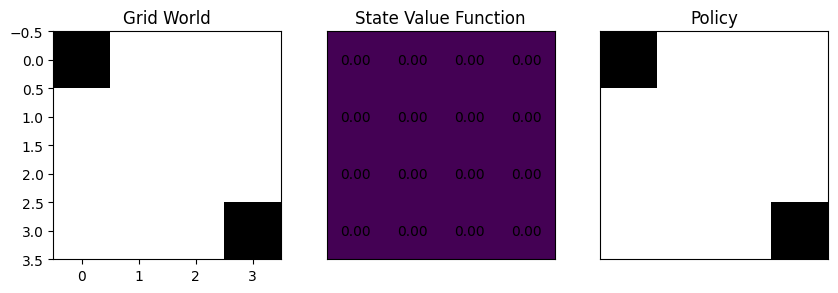

Policy Iteration Converged


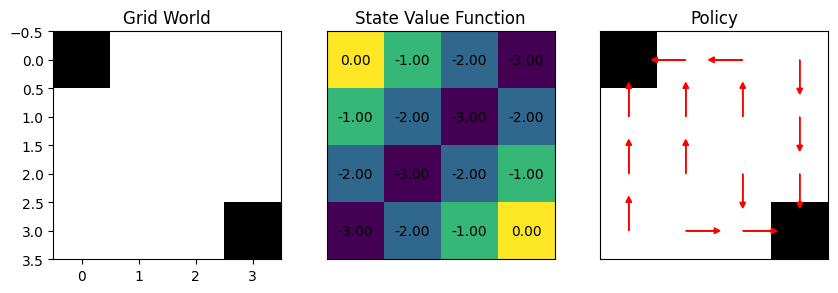

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Grid World
grid_world = np.zeros((4,4))
grid_world[0,0] = 1     # Terminal State
grid_world[3,3] = 1     # Terminal State

V = np.zeros((4,4))

# Initial Policy
policy = np.ones((4,4,4))/4
policy[0,0] = np.zeros(4)
policy[3,3] = np.zeros(4)

plot_policy(grid_world=grid_world, state_value_function=V, policy=policy)
optimal_policy, optimal_state_value = policy_iteration(policy, theta=0.01, max_iter=10, initial_V=V, grid_world=grid_world)
plot_policy(grid_world=grid_world, state_value_function=optimal_state_value, policy=optimal_policy)

### Value Iteration

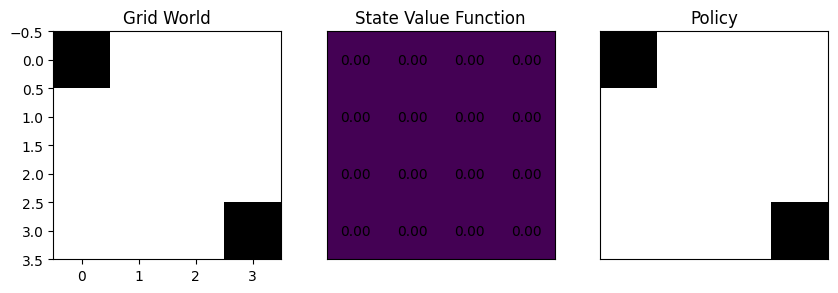

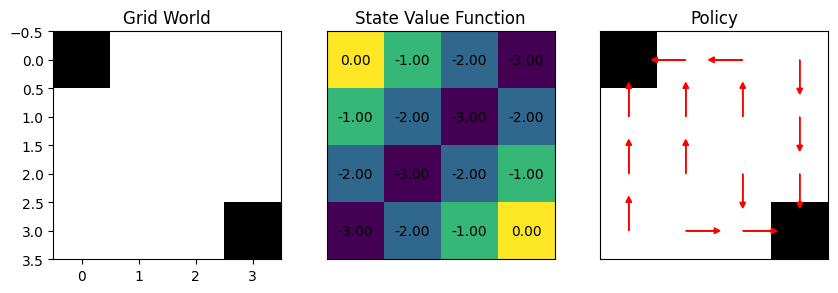

In [3]:
import numpy as np

# Grid World
grid_world = np.zeros((4,4))
grid_world[0,0] = 1     # Terminal State
grid_world[3,3] = 1     # Terminal State

V = np.zeros((4,4))

# Initial Policy
policy = np.ones((4,4,4))/4
policy[0,0] = np.zeros(4)
policy[3,3] = np.zeros(4)

plot_policy(grid_world=grid_world, state_value_function=V, policy=policy)
optimal_policy, optimal_state_value = value_iteration(grid_world=grid_world)
plot_policy(grid_world=grid_world, state_value_function=optimal_state_value, policy=optimal_policy)